# EDA - Sleep Health & Lifestyle Dataset

## Objective 
Perform a comprehensive exploratory data analysis of the Sleep health & Lifestly dataset to:

- Understand data strucure and quality
- Indentify patterns and relationships between variables
- Detect missing values and outliers
- Prepare the dataset for feature engineering and modeling

# Dataset
**File**: `01_sleep_health_lifestyle.csv`  
**Source**: Sleep and Health & Lifestyle Dataset
**Key variables**: Sleep Duration, Quality of sleep, Stress level, Physical activity 
  

In [40]:
!pip install seaborn
!pip install scipy

## 1.Imports and settings

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
import scipy.stats as normaltest

In [42]:
# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [43]:
# Visualization settings}
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

In [44]:
# Path configuration
BASE_DIR = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
RAW_DATA_DIR = BASE_DIR / 'datasets' / 'raw'
PROCESSED_DATA_DIR = BASE_DIR / 'datasets' / 'processed'

# Create the datasets directory if it doesn't exist
PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)
print("Set up complete. Ready to proceed with the analysis!")
print("Datasets directory created at:", PROCESSED_DATA_DIR)
print("Datasets directory created at:", RAW_DATA_DIR)
print("Datasets processed directory created at:", PROCESSED_DATA_DIR)

Set up complete. Ready to proceed with the analysis!
Datasets directory created at: c:\Users\rafae\Desktop\Personal_Information_App\ai_personal_performance_coach\datasets\processed
Datasets directory created at: c:\Users\rafae\Desktop\Personal_Information_App\ai_personal_performance_coach\datasets\raw
Datasets processed directory created at: c:\Users\rafae\Desktop\Personal_Information_App\ai_personal_performance_coach\datasets\processed


## 2. Load data 

In [45]:
df = pd.read_csv(RAW_DATA_DIR / '01_sleep_health_lifestyle.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## 3. Data analysis about general information

In [46]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [48]:
print("Lenght of the dataset:", len(df))
print("Number of features:", len(df.columns))

Lenght of the dataset: 374
Number of features: 13


In [49]:
# Check if there are missing values
df.isna().any()

Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder              True
dtype: bool

In [50]:
# Select the raws with missing values
missing_values = df[df.isna().any(axis=1)]
print("Number of rows with missing values:", len(missing_values))
missing_values.head()

Number of rows with missing values: 219


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


### Descriptive statistics

In [51]:
# select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['Person ID',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps']

In [52]:
if numerical_columns:
    descriptive_stats = df[numerical_columns].describe().round(2)
    print(descriptive_stats.to_string())

    print(f"Additional statistics:")
    additional_stats = pd.DataFrame({
        'Mean': df[numerical_columns].mean(),
        'Median': df[numerical_columns].median(),
        'Std': df[numerical_columns].std(),
        'Min': df[numerical_columns].min(),
        'Max': df[numerical_columns].max(),
        'Skewness': df[numerical_columns].skew(),
        'Minimum': df[numerical_columns].min(),
        'Maximum': df[numerical_columns].max(),
        'Range': df[numerical_columns].max() - df[numerical_columns].min(),
        '25%': df[numerical_columns].quantile(0.25),
        '50%': df[numerical_columns].quantile(0.5),
        '75%': df[numerical_columns].quantile(0.75),
    });
    print(additional_stats.to_string())

       Person ID     Age  Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level  Heart Rate  Daily Steps
count     374.00  374.00          374.00            374.00                   374.00        374.00      374.00       374.00
mean      187.50   42.18            7.13              7.31                    59.17          5.39       70.17      6816.84
std       108.11    8.67            0.80              1.20                    20.83          1.77        4.14      1617.92
min         1.00   27.00            5.80              4.00                    30.00          3.00       65.00      3000.00
25%        94.25   35.25            6.40              6.00                    45.00          4.00       68.00      5600.00
50%       187.50   43.00            7.20              7.00                    60.00          5.00       70.00      7000.00
75%       280.75   50.00            7.80              8.00                    75.00          7.00       72.00      8000.00
max       374.00

#### Categorial variables Analysis
Explore the distributions of categorical variables and their frequencies

In [53]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns
print(categorical_columns)

for col in categorical_columns:
    print(f"\n{'='*60}")
    print(f" {col}")
    print(f"{'='*60}")
    value_counts = df[col].value_counts()
    value_count_pct = df[col].value_counts(normalize=True) * 100

    summary = pd.DataFrame({
        'Value Counts': value_counts,
        'Percentage': value_count_pct,
        "Column Percentage": value_count_pct.round(2)
    })
    print(summary)
    print("total unique categories:", df[col].nunique())
    print("Missing values:", df[col].isna().sum())

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

 Gender
        Value Counts  Percentage  Column Percentage
Gender                                             
Male             189   50.534759              50.53
Female           185   49.465241              49.47
total unique categories: 2
Missing values: 0

 Occupation
                      Value Counts  Percentage  Column Percentage
Occupation                                                       
Nurse                           73   19.518717              19.52
Doctor                          71   18.983957              18.98
Engineer                        63   16.844920              16.84
Lawyer                          47   12.566845              12.57
Teacher                         40   10.695187              10.70
Accountant                      37    9.893048               9.89
Salesperson                     32    8.556150               8.56
Scientist                        4    1.069519        

#### Visualisations - Distribution
Visualize the distribution of key variables to better understand the data

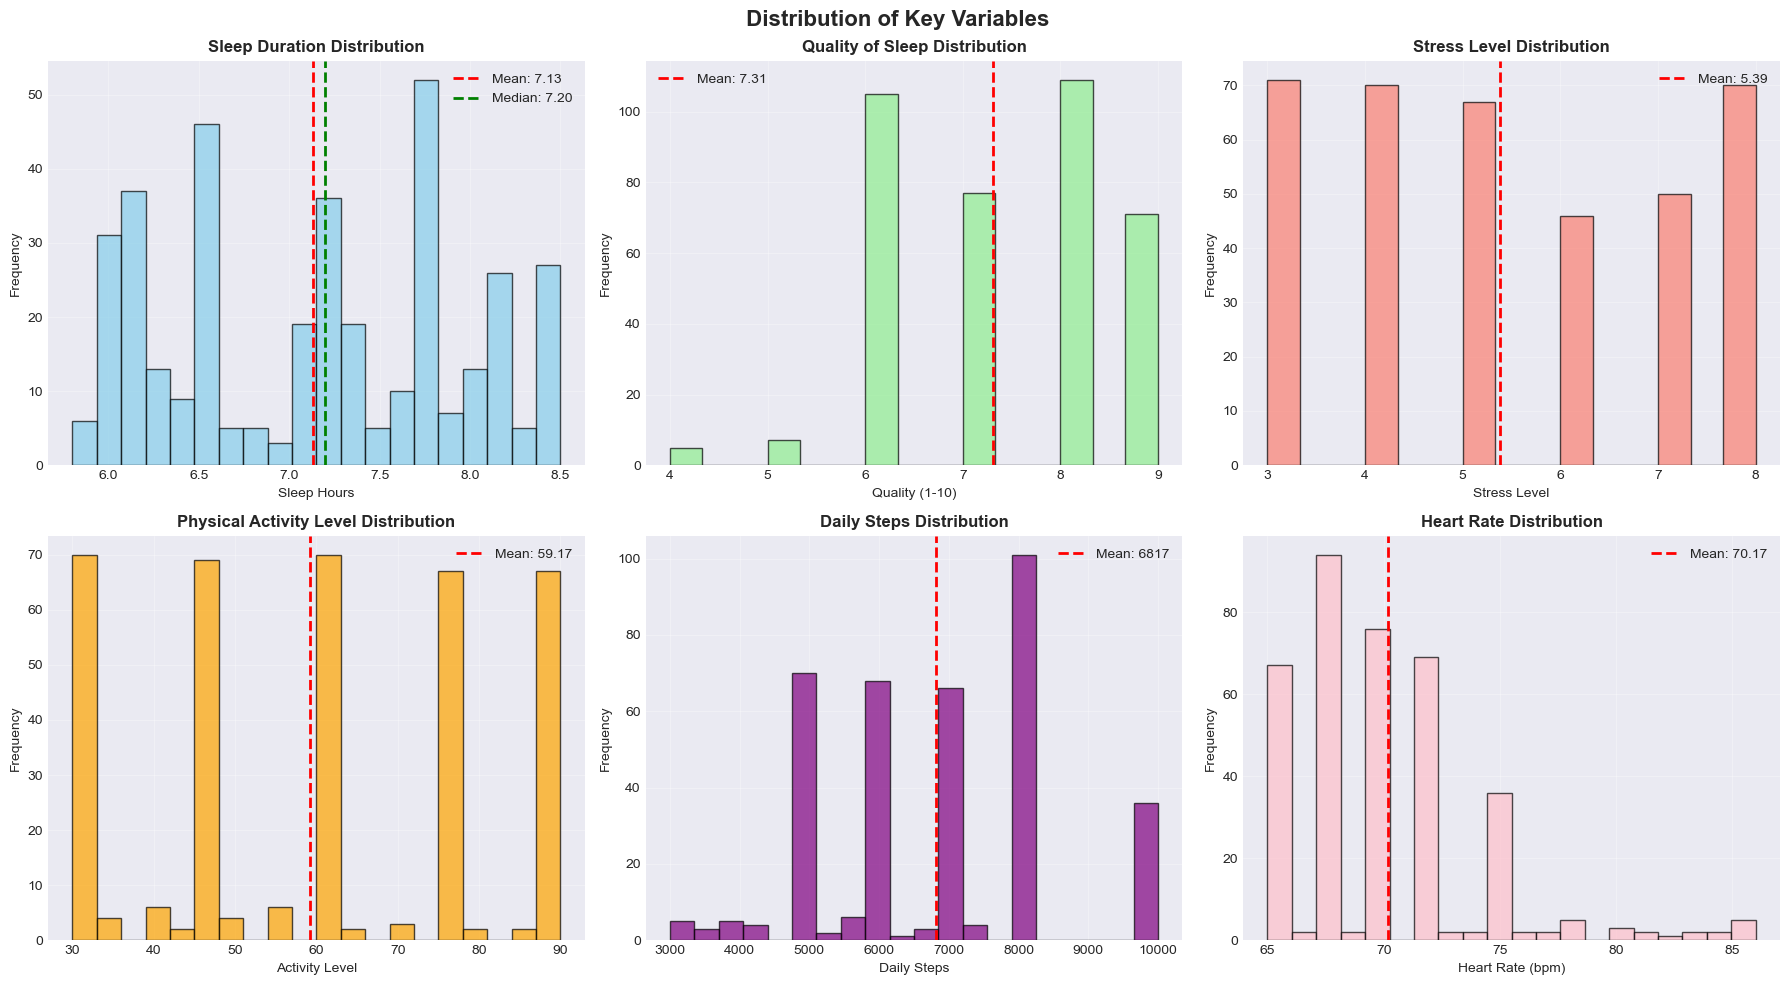

In [54]:
fig, axes = plt.subplots(2, 3, figsize=(18,10))
fig.suptitle(" Distribution of Key Variables", fontsize=16, fontweight='bold')


if 'Sleep Duration' in df.columns:
    axes[0, 0].hist(df['Sleep Duration'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0, 0].axvline(df['Sleep Duration'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Sleep Duration"].mean():.2f}')
    axes[0, 0].axvline(df['Sleep Duration'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Sleep Duration"].median():.2f}')
    axes[0, 0].set_title('Sleep Duration Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Sleep Hours')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

# 2. Quality of Sleep
if 'Quality of Sleep' in df.columns:
    axes[0, 1].hist(df['Quality of Sleep'].dropna(), bins=15, edgecolor='black', alpha=0.7, color='lightgreen')
    axes[0, 1].axvline(df['Quality of Sleep'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Quality of Sleep"].mean():.2f}')
    axes[0, 1].set_title('Quality of Sleep Distribution', fontweight='bold')
    axes[0, 1].set_xlabel('Quality (1-10)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

# 3. Stress Level
if 'Stress Level' in df.columns:
    axes[0, 2].hist(df['Stress Level'].dropna(), bins=15, edgecolor='black', alpha=0.7, color='salmon')
    axes[0, 2].axvline(df['Stress Level'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Stress Level"].mean():.2f}')
    axes[0, 2].set_title('Stress Level Distribution', fontweight='bold')
    axes[0, 2].set_xlabel('Stress Level')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)


# 4. Physical Activity Level
if 'Physical Activity Level' in df.columns:
    axes[1, 0].hist(df['Physical Activity Level'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='orange')
    axes[1, 0].axvline(df['Physical Activity Level'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Physical Activity Level"].mean():.2f}')
    axes[1, 0].set_title('Physical Activity Level Distribution', fontweight='bold')
    axes[1, 0].set_xlabel('Activity Level')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# 5. Daily Steps
if 'Daily Steps' in df.columns:
    axes[1, 1].hist(df['Daily Steps'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='purple')
    axes[1, 1].axvline(df['Daily Steps'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Daily Steps"].mean():.0f}')
    axes[1, 1].set_title('Daily Steps Distribution', fontweight='bold')
    axes[1, 1].set_xlabel('Daily Steps')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

# 6. Heart Rate
if 'Heart Rate' in df.columns:
    axes[1, 2].hist(df['Heart Rate'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='pink')
    axes[1, 2].axvline(df['Heart Rate'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Heart Rate"].mean():.2f}')
    axes[1, 2].set_title('Heart Rate Distribution', fontweight='bold')
    axes[1, 2].set_xlabel('Heart Rate (bpm)')
    axes[1, 2].set_ylabel('Frequency')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(PROCESSED_DATA_DIR / '01_sleep_health_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


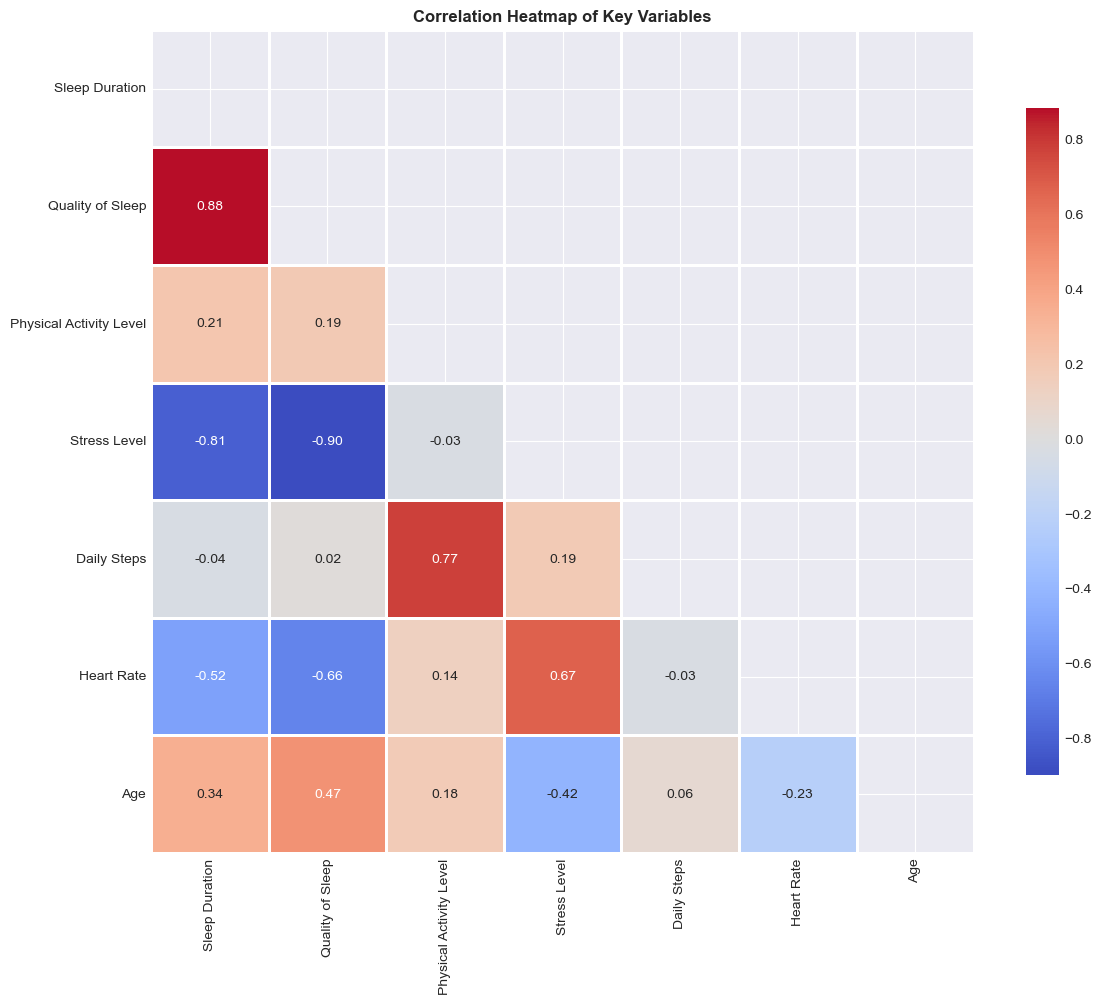

              Feature 1        Feature 2  Correlation
         Sleep Duration Quality of Sleep     0.883213
Physical Activity Level      Daily Steps     0.772723
           Stress Level       Heart Rate     0.670026
       Quality of Sleep              Age     0.473734
         Sleep Duration              Age     0.344709
           Stress Level              Age    -0.422344
         Sleep Duration       Heart Rate    -0.516455
       Quality of Sleep       Heart Rate    -0.659865
         Sleep Duration     Stress Level    -0.811023
       Quality of Sleep     Stress Level    -0.898752


In [55]:
# Correlation matrix
key_vars = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
            'Stress Level', 'Daily Steps', 'Heart Rate', 'Age']


key_vars = [v for v in key_vars if v in df.columns]

if len(key_vars) > 1:
    corr_matrix = df[key_vars].corr()

    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        square=True,
        linewidths=1,
        cbar_kws={'shrink': 0.8}
    )
    plt.title('Correlation Heatmap of Key Variables', fontweight='bold')
    plt.tight_layout()
    plt.savefig(PROCESSED_DATA_DIR / '01_sleep_health_correlation.png', dpi=300, bbox_inches='tight')
    plt.show()

    ## Table of strongest correlations
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i,j]
            if abs(corr_val) > 0.3:
                corr_pairs.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_val
                })

    if corr_pairs:
        corr_df = pd.DataFrame(corr_pairs).sort_values(by='Correlation', ascending=False)
        print(corr_df.to_string(index=False))
    else:
        print("No strong correlations found(|r| > 0.3)")
    

#### Scatter Plots (relationship between features)

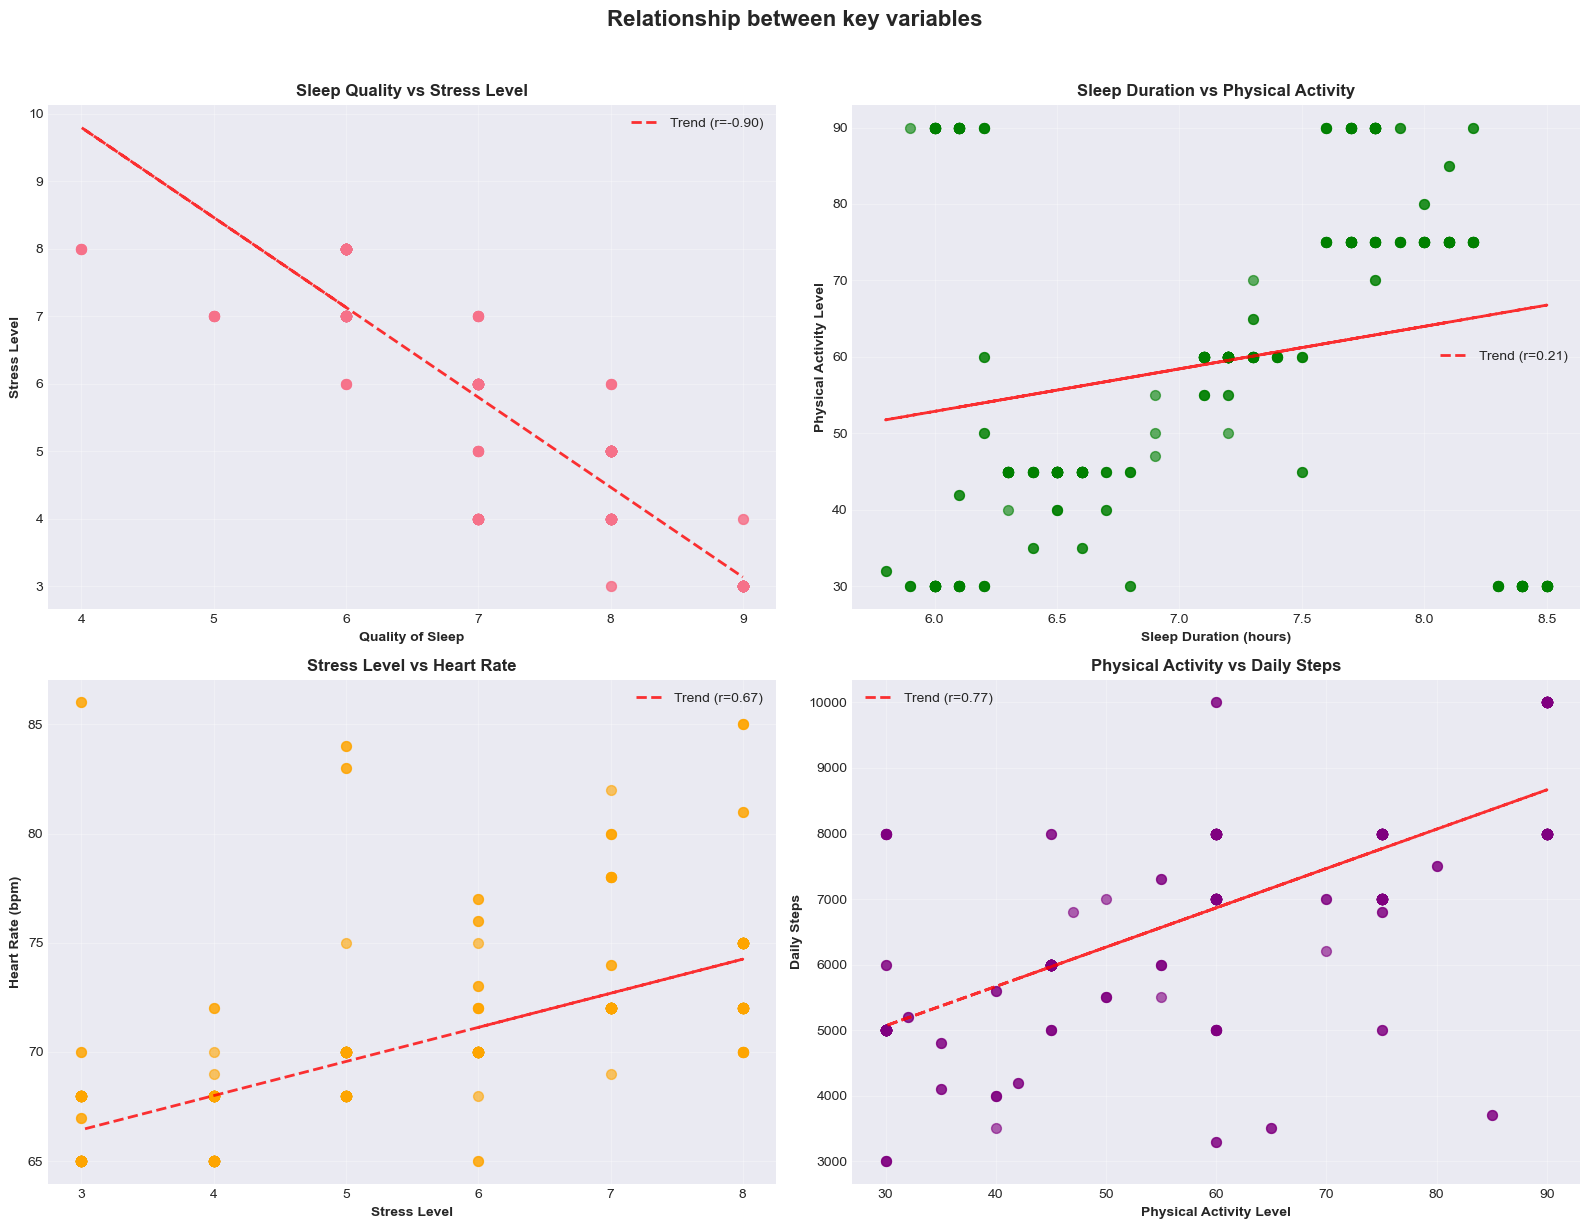

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
fig.suptitle("Relationship between key variables", fontsize=16, fontweight='bold', y=1.02)

# 1. Sleep Quality vs Stress Level
if 'Quality of Sleep' in df.columns and 'Stress Level' in df.columns:
    axes[0, 0].scatter(df['Quality of Sleep'], df['Stress Level'], alpha=0.6, s=50)
    axes[0, 0].set_xlabel('Quality of Sleep', fontweight='bold')
    axes[0, 0].set_ylabel('Stress Level', fontweight='bold')
    axes[0, 0].set_title('Sleep Quality vs Stress Level', fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Trend line
    z = np.polyfit(df['Quality of Sleep'].dropna(), df['Stress Level'].dropna(), 1)
    p = np.poly1d(z)
    corr_val = df[['Quality of Sleep', 'Stress Level']].corr().iloc[0,1]
    axes[0, 0].plot(df['Quality of Sleep'].dropna(), p(df['Quality of Sleep'].dropna()), 
                    "r--", alpha=0.8, linewidth=2, label=f'Trend (r={corr_val:.2f})')
    axes[0, 0].legend()

# 2. Sleep Duration vs Physical Activity
if 'Sleep Duration' in df.columns and 'Physical Activity Level' in df.columns:
    axes[0, 1].scatter(df['Sleep Duration'], df['Physical Activity Level'], alpha=0.6, s=50, color='green')
    axes[0, 1].set_xlabel('Sleep Duration (hours)', fontweight='bold')
    axes[0, 1].set_ylabel('Physical Activity Level', fontweight='bold')
    axes[0, 1].set_title('Sleep Duration vs Physical Activity', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    z = np.polyfit(df['Sleep Duration'].dropna(), df['Physical Activity Level'].dropna(), 1)
    p = np.poly1d(z)
    corr_val = df[['Sleep Duration', 'Physical Activity Level']].corr().iloc[0,1]
    axes[0, 1].plot(df['Sleep Duration'].dropna(), p(df['Sleep Duration'].dropna()), 
                    "r--", alpha=0.8, linewidth=2, label=f'Trend (r={corr_val:.2f})')
    axes[0, 1].legend()

# 3. Stress Level vs Heart Rate
if 'Stress Level' in df.columns and 'Heart Rate' in df.columns:
    axes[1, 0].scatter(df['Stress Level'], df['Heart Rate'], alpha=0.6, s=50, color='orange')
    axes[1, 0].set_xlabel('Stress Level', fontweight='bold')
    axes[1, 0].set_ylabel('Heart Rate (bpm)', fontweight='bold')
    axes[1, 0].set_title('Stress Level vs Heart Rate', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    
    z = np.polyfit(df['Stress Level'].dropna(), df['Heart Rate'].dropna(), 1)
    p = np.poly1d(z)
    corr_val = df[['Stress Level', 'Heart Rate']].corr().iloc[0,1]
    axes[1, 0].plot(df['Stress Level'].dropna(), p(df['Stress Level'].dropna()), 
                    "r--", alpha=0.8, linewidth=2, label=f'Trend (r={corr_val:.2f})')
    axes[1, 0].legend()

# 4. Physical Activity vs Daily Steps
if 'Physical Activity Level' in df.columns and 'Daily Steps' in df.columns:
    axes[1, 1].scatter(df['Physical Activity Level'], df['Daily Steps'], alpha=0.6, s=50, color='purple')
    axes[1, 1].set_xlabel('Physical Activity Level', fontweight='bold')
    axes[1, 1].set_ylabel('Daily Steps', fontweight='bold')
    axes[1, 1].set_title('Physical Activity vs Daily Steps', fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    
    z = np.polyfit(df['Physical Activity Level'].dropna(), df['Daily Steps'].dropna(), 1)
    p = np.poly1d(z)
    corr_val = df[['Physical Activity Level', 'Daily Steps']].corr().iloc[0,1]
    axes[1, 1].plot(df['Physical Activity Level'].dropna(), p(df['Physical Activity Level'].dropna()), 
                    "r--", alpha=0.8, linewidth=2, label=f'Trend (r={corr_val:.2f})')
    axes[1, 1].legend()

plt.tight_layout()
plt.savefig(PROCESSED_DATA_DIR / '01_sleep_health_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()




#### Analysis by categories



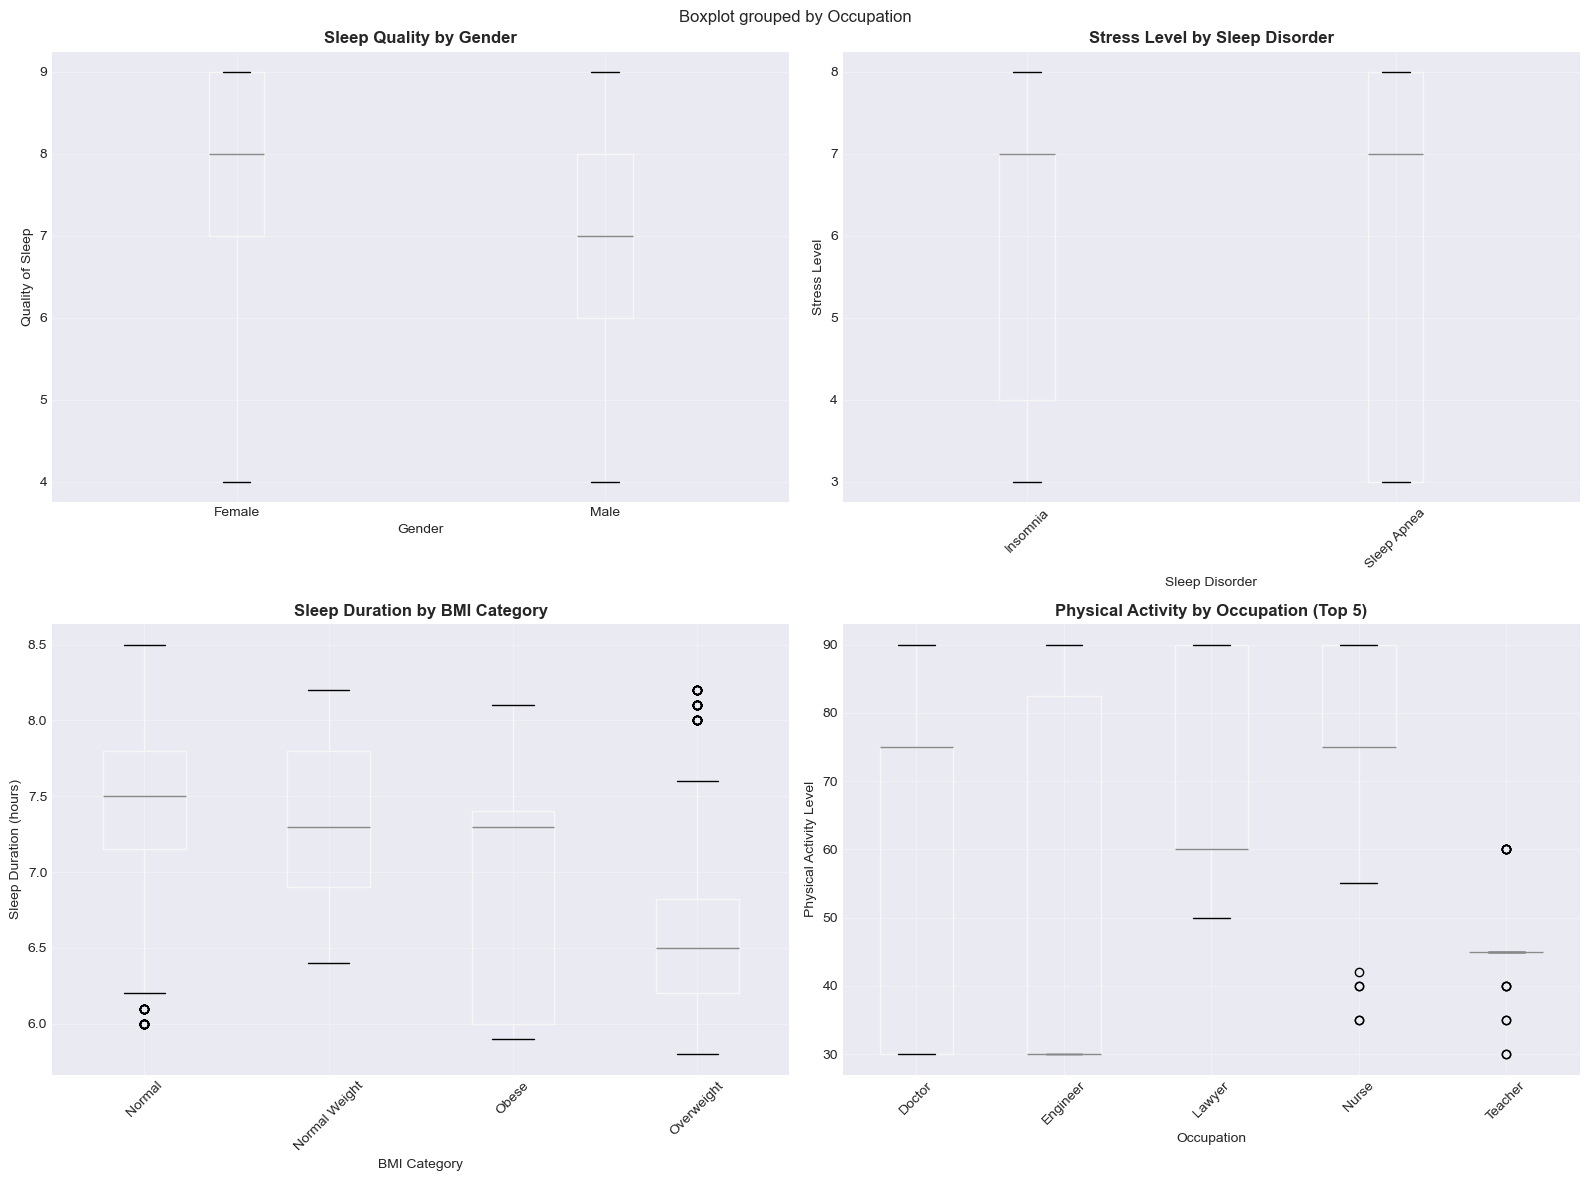


 Stress Level by Gender:
        mean   std  count
Gender                   
Female  4.68  1.91    185
Male    6.08  1.30    189

 Quality of Sleep by Sleep Disorder:
                mean   std  count
Sleep Disorder                   
Insomnia        6.53  0.80     77
Sleep Apnea     7.21  1.65     78


In [57]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
fig.suptitle("Analysis by Categories", fontsize=16, fontweight='bold', y=1.02)

# 1. Sleep Quality by Gender
if 'Gender' in df.columns and 'Quality of Sleep' in df.columns:
    df.boxplot(column='Quality of Sleep', by='Gender', ax=axes[0, 0])
    axes[0, 0].set_title('Sleep Quality by Gender', fontweight='bold')
    axes[0, 0].set_xlabel('Gender')
    axes[0, 0].set_ylabel('Quality of Sleep')
    axes[0, 0].grid(True, alpha=0.3)

# 2. Stress Level by Sleep Disorder
if 'Sleep Disorder' in df.columns and 'Stress Level' in df.columns:
    df.boxplot(column='Stress Level', by='Sleep Disorder', ax=axes[0, 1])
    axes[0, 1].set_title('Stress Level by Sleep Disorder', fontweight='bold')
    axes[0, 1].set_xlabel('Sleep Disorder')
    axes[0, 1].set_ylabel('Stress Level')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)

# 3. Sleep Duration by BMI Category
if 'BMI Category' in df.columns and 'Sleep Duration' in df.columns:
    df.boxplot(column='Sleep Duration', by='BMI Category', ax=axes[1, 0])
    axes[1, 0].set_title('Sleep Duration by BMI Category', fontweight='bold')
    axes[1, 0].set_xlabel('BMI Category')
    axes[1, 0].set_ylabel('Sleep Duration (hours)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)

# 4. Physical Activity by Occupation
if 'Occupation' in df.columns and 'Physical Activity Level' in df.columns:
    # Top 5 most common occupations
    top_occupations = df['Occupation'].value_counts().head(5).index
    df_filtered = df[df['Occupation'].isin(top_occupations)]
    df_filtered.boxplot(column='Physical Activity Level', by='Occupation', ax=axes[1, 1])
    axes[1, 1].set_title('Physical Activity by Occupation (Top 5)', fontweight='bold')
    axes[1, 1].set_xlabel('Occupation')
    axes[1, 1].set_ylabel('Physical Activity Level')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(PROCESSED_DATA_DIR / '01_sleep_health_by_category.png', dpi=300, bbox_inches='tight')
plt.show()



if 'Gender' in df.columns and 'Stress Level' in df.columns:
    print("\n Stress Level by Gender:")
    print(df.groupby('Gender')['Stress Level'].agg(['mean', 'std', 'count']).round(2))

if 'Sleep Disorder' in df.columns and 'Quality of Sleep' in df.columns:
    print("\n Quality of Sleep by Sleep Disorder:")
    print(df.groupby('Sleep Disorder')['Quality of Sleep'].agg(['mean', 'std', 'count']).round(2))

## 4. Cleaning data

### Overview
The `Sleep Disorder` variable contains **219 missing values (58.5% of 374 records)**, which is a substantial proportion. Before applying any imputation technique, we must first determine whether this feature is **statistically relevant** for predicting our target variables (Stress Level, Sleep Quality).

### Analysis Plan
1. **Distribution Check**: Examine the frequency of each category (None, Sleep Apnea, Insomnia)
2. **Relationship Analysis**: 
   - Compare mean `Stress Level` across different `Sleep Disorder` categories
   - Compare mean `Quality of Sleep` across categories
3. **Statistical Significance Test**: 
   - Perform **ANOVA (Analysis of Variance)** to test if stress levels differ significantly between sleep disorder groups
   - Null Hypothesis: No significant difference in stress levels across categories
   - If p-value < 0.05: Variable is **RELEVANT** → Impute
   - If p-value >= 0.05: Variable is **NOT RELEVANT** → Consider removal
4. **Visual Validation**: Box plots to visually confirm statistical findings


In [58]:
## Relationship between Sleep Disorder and Stress Level
if 'Sleep Disorder' in df.columns: 
    stress_by_disorder = df.groupby('Sleep Disorder')['Stress Level'].agg(['mean', 'std', 'count']).round(2)
    print(stress_by_disorder)

    from scipy.stats import f_oneway
    groups = [df[df['Sleep Disorder'] == disorder]['Stress Level'].dropna() 
              for disorder in df['Sleep Disorder'].dropna().unique()]
    if len(groups) > 1:
        f_stat, p_value = f_oneway(*groups)
        print(f"ANOVA results - F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")
        if p_value < 0.05:
            print("Significant difference in stress levels between sleep disorder groups")
        else: 
            print("No significant difference in stress levels between sleep disorder groups")
        
        print("Interpetation:")
        print(f"   - The difference in mean stress levels across groups is not statistically significant")
        print(f"   - Stress levels are similar regardless of sleep disorder type")
        print(f"   - This suggests Sleep Disorder may not be a strong predictor of Stress Level")
    else:
        print("Not enough data to perform ANOVA")



                mean   std  count
Sleep Disorder                   
Insomnia        5.87  1.46     77
Sleep Apnea     5.67  2.33     78
ANOVA results - F-statistic: 0.42, p-value: 0.5171
No significant difference in stress levels between sleep disorder groups
Interpetation:
   - The difference in mean stress levels across groups is not statistically significant
   - Stress levels are similar regardless of sleep disorder type
   - This suggests Sleep Disorder may not be a strong predictor of Stress Level


                mean   std  count
Sleep Disorder                   
Insomnia        6.53  0.80     77
Sleep Apnea     7.21  1.65     78


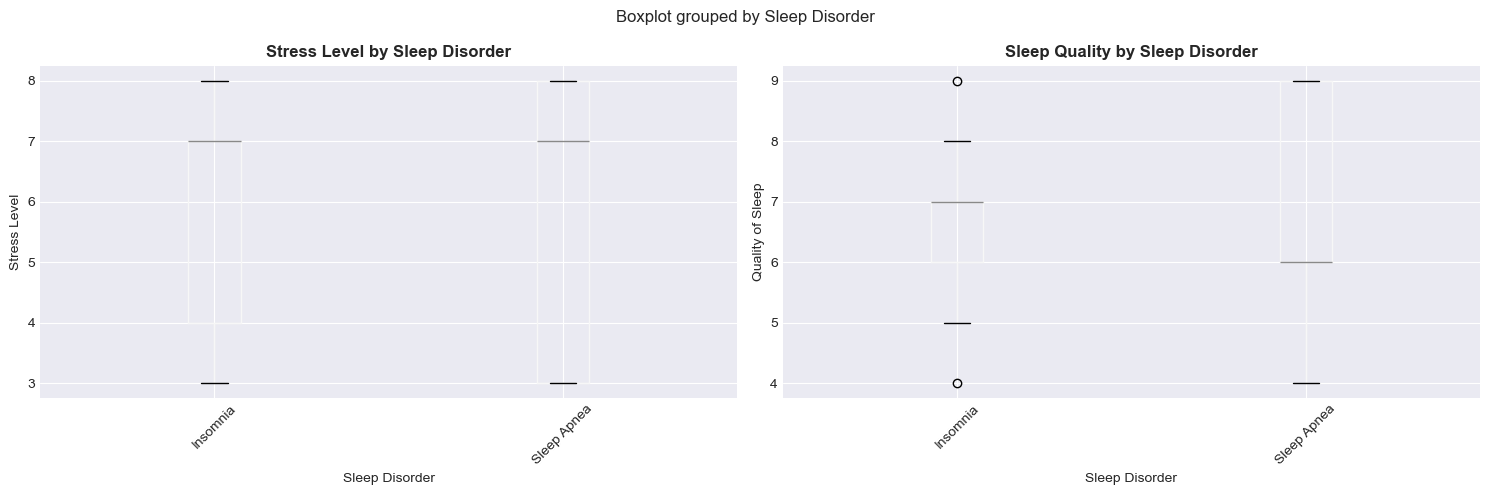

In [59]:
## Relationship between Sleep Disorder and Quality of Sleep
if 'Quality of Sleep' in df.columns:
    quality_by_disorder = df.groupby('Sleep Disorder')['Quality of Sleep'].agg(['mean', 'std', 'count']).round(2)
    print(quality_by_disorder)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

if 'Stress Level' in df.columns:
    df.boxplot(column='Stress Level', by='Sleep Disorder', ax=axes[0])
    axes[0].set_title('Stress Level by Sleep Disorder', fontweight='bold')
    axes[0].set_xlabel('Sleep Disorder')
    axes[0].set_ylabel('Stress Level')
    axes[0].tick_params(axis='x', rotation=45)

# Sleep Quality by Sleep Disorder
if 'Quality of Sleep' in df.columns:
    df.boxplot(column='Quality of Sleep', by='Sleep Disorder', ax=axes[1])
    axes[1].set_title('Sleep Quality by Sleep Disorder', fontweight='bold')
    axes[1].set_xlabel('Sleep Disorder')
    axes[1].set_ylabel('Quality of Sleep')
    axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(PROCESSED_DATA_DIR / '01_sleep_disorder_relevance.png', dpi=300, bbox_inches='tight')
plt.show()


#### Recomendation with base in the results: REMOVE THE COLUMN

## Reasons:
1. No statitical significanse: Sleep disorder doesn't significatly predict Stress level
2. High missing rate: 58.5% of data is missing
3. Low predictive value: adding noise without
4. model simplification

In [60]:
# Rename the columns
column_mapping = {
    'Sleep Duration': 'sleep_duration',
    'Quality of Sleep': 'sleep_quality',
    'Physical Activity Level': 'physical_activity',
    'Stress Level': 'stress_level',
    'Daily Steps': 'daily_steps',
    'Heart Rate': 'heart_rate',
    'Blood Pressure': 'blood_pressure',
    'BMI Category': 'bmi_category',
    'Sleep Disorder': 'sleep_disorder',
    'Person ID': 'person_id'
}
df = df.rename(columns=column_mapping)

In [61]:
df_copy = df.copy()

In [62]:
# remove duplicates before drop columns
initial_shape = df_copy.shape
initial_shape

(374, 13)

In [63]:
df_copy = df_copy.drop_duplicates()
print(f"\n1. Duplicates removed: {initial_shape[0] - df_copy.shape[0]} records")


1. Duplicates removed: 0 records


In [64]:
df_copy.drop(columns=['sleep_disorder'], inplace=True)
df_copy.head()

,person_id,Gender,Age,Occupation,sleep_duration,sleep_quality,physical_activity,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000


In [65]:
# Process blood pressure
if 'blood_pressure' in df_copy.columns:
    if df_copy['blood_pressure'].dtype == 'object':
        bp_slipt = df_copy['blood_pressure'].str.split('/', expand=True)
        if (len(bp_slipt.columns) >= 2):
            df_copy['blood_pressure_systolic'] = pd.to_numeric(bp_slipt[0], errors='coerce')
            df_copy['blood_pressure_diastolic'] = pd.to_numeric(bp_slipt[1], errors='coerce')
            df_copy.drop(columns=['blood_pressure'], inplace=True)
            print("Blood pressure processed successfully")
        else:
            print("Blood pressure column format is not as expected")

df_copy

Blood pressure processed successfully


,person_id,Gender,Age,Occupation,sleep_duration,sleep_quality,physical_activity,stress_level,bmi_category,heart_rate,daily_steps,blood_pressure_systolic,blood_pressure_diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95


In [66]:
# Create useful categories
if 'sleep_quality' in df_copy.columns:
    df_copy['sleep_quality_category'] = pd.cut(
        df_copy['sleep_quality'],
        bins=[0,4,7,10],
        labels=['Poor', 'Moderate', 'Good']
    )
    print("Sleep quality categories created successfully")
df_copy

Sleep quality categories created successfully


,person_id,Gender,Age,Occupation,sleep_duration,sleep_quality,physical_activity,stress_level,bmi_category,heart_rate,daily_steps,blood_pressure_systolic,blood_pressure_diastolic,sleep_quality_category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,Moderate
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,Moderate
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,Moderate
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Poor
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,Good
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,140,95,Good
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,Good
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,Good


In [67]:
if 'stress_level' in df_copy.columns:
    df_copy['stress_category'] = pd.cut(
        df_copy['stress_level'],
        bins=[0,3,6,10],
        labels=['Low', 'Medium', 'High']
    )
    print("Stress level categories created successfully")
df_copy

Stress level categories created successfully


,person_id,Gender,Age,Occupation,sleep_duration,sleep_quality,physical_activity,stress_level,bmi_category,heart_rate,daily_steps,blood_pressure_systolic,blood_pressure_diastolic,sleep_quality_category,stress_category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,Moderate,Medium
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,Moderate,High
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,Moderate,High
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Poor,High
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,Poor,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,Good,Low
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,140,95,Good,Low
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,Good,Low
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95,Good,Low


Finally, we will drop the redundant another columns to maintain simplify model

In [69]:
numeric_cols = df_copy.select_dtypes(include=['number']).columns.tolist()

if len(numeric_cols) > 1:
    corr_matrix = df_copy[numeric_cols].corr()

    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i,j]
            if abs(corr_val) > 0.75:
                high_corr_pairs.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_val
                })
                
    if high_corr_pairs:
        print("\nHighly correlated features:")
        for pair in high_corr_pairs:
            print(f"{pair['Feature 1']} and {pair['Feature 2']} with correlation {pair['Correlation']:.2f}")
    else: 
        print("No highly correlated features found")


Highly correlated features:
person_id and Age with correlation 0.99
sleep_duration and sleep_quality with correlation 0.88
sleep_duration and stress_level with correlation -0.81
sleep_quality and stress_level with correlation -0.90
physical_activity and daily_steps with correlation 0.77
blood_pressure_systolic and blood_pressure_diastolic with correlation 0.97


In [71]:
for col in numeric_cols:
    if col in df_copy.columns:
        variance = df_copy[col].var()
        std = df_copy[col].std()
        cv = (std / df_copy[col].mean()) * 100

        if cv < 5 and variance < 1:
            print(f"{col} has low variance and low CV, suggesting it may not be a strong predictor")
        else: 
            print(f"{col} has moderate variance and CV, suggesting it may be a strong predictor")

person_id has moderate variance and CV, suggesting it may be a strong predictor
Age has moderate variance and CV, suggesting it may be a strong predictor
sleep_duration has moderate variance and CV, suggesting it may be a strong predictor
sleep_quality has moderate variance and CV, suggesting it may be a strong predictor
physical_activity has moderate variance and CV, suggesting it may be a strong predictor
stress_level has moderate variance and CV, suggesting it may be a strong predictor
heart_rate has moderate variance and CV, suggesting it may be a strong predictor
daily_steps has moderate variance and CV, suggesting it may be a strong predictor
blood_pressure_systolic has moderate variance and CV, suggesting it may be a strong predictor
blood_pressure_diastolic has moderate variance and CV, suggesting it may be a strong predictor


## 9. Feature Selection: Removing Redundant and Non-Predictive Features

### Objective

Optimize the dataset by removing redundant features that introduce multicollinearity and non-predictive variables that add noise. This process improves model performance, reduces overfitting risk, and simplifies model interpretation.

### Decision Framework

Features are removed based on:
1. **High Correlation (r > 0.75)**: Redundant information, keeping the most informative feature
2. **Non-Predictive Value**: Identifiers or statistically non-significant features
3. **High Missing Rate**: Features with excessive missing data that cannot be reliably imputed
4. **Domain Knowledge**: Keeping features that are more standard or interpretable in the medical/health domain


### Columns Removed

#### 1. **Person ID** / **person_id**
- **Reason**: Identifier variable with no predictive value
- **Additional Issue**: Extremely high correlation with Age (r = 0.99), indicating sequential assignment
- **Impact**: Removing eliminates identifier bias and reduces dimensionality
- **Decision**:  **REMOVE**

#### 2. **Sleep Disorder** / **sleep_disorder**
- **Reason**: Not statistically significant predictor + High missing rate
- **Statistical Analysis**:
  - ANOVA test: F-statistic = 0.42, p-value = 0.5171
  - **Result**: No significant difference in Stress Level between Sleep Disorder categories
  - Null hypothesis accepted: Sleep Disorder does not significantly predict Stress Level
- **Data Quality Issue**:
  - Missing values: 219 out of 374 records (58.5%)
  - Cannot be reliably imputed due to lack of predictive power
- **Decision Rationale**:
  - No statistical evidence of relationship with target variable
  - High missing rate would require imputation (adding noise)
  - Removing reduces model complexity without losing predictive power
- **Impact**: Eliminates noise and simplifies feature space
- **Decision**:  **REMOVE**

#### 3. **Daily Steps** / **daily_steps**
- **Reason**: Highly correlated with Physical Activity Level (r = 0.77)
- **Statistical Analysis**:
  - Correlation coefficient: r = 0.77 (strong positive correlation)
  - Both features measure physical activity but at different levels of specificity
  - Daily Steps is a concrete metric, Physical Activity Level is more general
- **Decision Rationale**:
  - **Redundancy**: High correlation indicates both features capture similar information
  - **Generality**: Physical Activity Level provides broader context for ML models
  - **Stability**: Less granular measures tend to be more stable across different contexts
  - **Model Simplification**: Keeping only Physical Activity Level reduces multicollinearity
- **Impact**: 
  - Reduces feature redundancy
  - Maintains activity information through Physical Activity Level
  - Simplifies model without losing predictive power
- **Decision**:  **REMOVE** (Keep Physical Activity Level)

#### 4. **Blood Pressure** / **blood_pressure**
- **Reason**: Original unprocessed column (string format)
- **Data Format Issue**:
  - Original format: "XXX/YY" (e.g., "126/83" as string)
  - Not directly usable in ML models (requires parsing)
- **Processing Status**:
  - Already processed into separate numeric columns:
    - `blood_pressure_systolic` (numeric)
    - `blood_pressure_diastolic` (numeric)
- **Decision Rationale**:
  - Processed features are ready for model training
  - Original string column requires parsing during every model run
  - Keeping both original and processed creates redundancy
  - Best practice: Keep processed, remove original
- **Impact**: 
  - Eliminates redundant column
  - Ensures only numeric, ML-ready features remain
  - Prevents confusion between original and processed versions
- **Decision**:  **REMOVE** (Keep processed bp_systolic and bp_diastolic)


#### 5. **Blood Pressure Systolic** / **blood_pressure_systolic**
- **Reason**: Model simplification - removing all blood pressure features
- **Statistical Context**:
  - High correlation with bp_diastolic (r = 0.97)
  - Both systolic and diastolic provide overlapping cardiovascular information
- **Decision Rationale**:
  - **Feature Focus**: Prioritizing core features (sleep, activity, stress)
  - **Model Simplification**: Reducing feature space for better interpretability
  - **Predictive Power**: Other features (sleep quality, heart rate) may capture similar health signals
  - **Domain Considerations**: Blood pressure may be less directly related to productivity/stress prediction than sleep and activity metrics
- **Alternative Approach** (if keeping BP):
  - Could keep systolic (more standard in medical predictions)
  - Could remove diastolic instead (more redundant)
  - **Current Decision**: Remove all BP features for maximum simplicity
- **Impact**:
  - Further reduces dimensionality
  - Focuses model on lifestyle/sleep/stress features
  - Maintains interpretability and model simplicity
- **Decision**:  **REMOVE** (Part of strategy to remove all blood pressure features)



In [74]:
# Remove redundant and non-predictive columns
columns_to_remove_final = ['person_id', 'sleep_disorder', 'daily_steps', 'blood_pressure', 'blood_pressure_systolic']
df_clean = df_copy.drop(columns=[col for col in columns_to_remove_final if col in df_copy.columns], errors='ignore')

df_clean

,Gender,Age,Occupation,sleep_duration,sleep_quality,physical_activity,stress_level,bmi_category,heart_rate,blood_pressure_diastolic,sleep_quality_category,stress_category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,83,Moderate,Medium
1,Male,28,Doctor,6.2,6,60,8,Normal,75,80,Moderate,High
2,Male,28,Doctor,6.2,6,60,8,Normal,75,80,Moderate,High
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,90,Poor,High
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,90,Poor,High
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,95,Good,Low
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,95,Good,Low
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,95,Good,Low
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,95,Good,Low


In [75]:
output_file = PROCESSED_DATA_DIR / '01_cleaned_data.csv'
df_clean.to_csv(output_file, index=False)

if output_file.exists():
    df_verify = pd.read_csv(output_file)
    print("Data saved successfully")
    print("shape of the cleaned data:", df_verify.shape)
else:
    print("Error: file was not saved")

Data saved successfully
shape of the cleaned data: (374, 12)
